In [1]:
# Import our dependencies
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


**Preparing the data For Model1 - where we are predicting if the 'favorite' horse wins, we used two datasets from "Kaggle" as listed below:**

*dataset 1 = races_* columns description: 
- rid - Race id; 
- Distance
- winningTime - Best time shown
- metric - Distance in meters
- class - class type (created from rclass feature).

*dataset 2 = horses_* columns description: 
- rid - Race id (column used to merge the 2 datasets)
- age - Horse age; 
- saddle - Saddle # where horse starts; 
- isFav - Was horse favorite before start? Can be more then one fav in a race;  
- position - Finishing position, 40 if horse didn't finish; 
- positionL - how far a horse has finished from the pursued horse, horses corpses; 
- outHandicap - Handicap; 
- RPR - RP Rating; 
- TR - Topspeed; 
- OR - Official Rating father - Horse's Father name; 
- runners - Runners total; 
- weight - Horse weight in kg; 
- res_win - Horse won or not; 


### For data clean up pls refer to CleanUp file 

# **Preprocessing Model 1 - Does the Favorite Horse win?**

 Step 1: Read the clean_data_model1.csv data from the Resources folder into a Pandas DataFrame.

In [2]:
clean_m1_df = pd.read_csv("Resources/clean_data_model1.csv")
clean_m1_df.head(5)

,rid,winningTime,metric,ncond,class,age,decimalPrice,isFav,position,positionL,distance,outHandicap,RPR,saddle,TR,OR,runners,weight,res_win
0,10312,253.88,3218.0,10,4,4,0.076923,0.0,1,4.57028,2.0,2.541359,103.0,9.0,103.0,74.677073,9.0,66.0,1.0
1,10312,253.88,3218.0,10,4,6,0.444444,1.0,2,15.00000,2.0,2.541359,96.0,7.0,89.0,110.000000,9.0,65.0,0.0
2,10312,253.88,3218.0,10,4,7,0.019608,0.0,3,5.50000,2.0,2.541359,97.0,5.0,88.0,74.677073,9.0,72.0,0.0
3,10312,253.88,3218.0,10,4,6,0.230769,0.0,4,10.00000,2.0,2.541359,89.0,4.0,75.0,74.677073,9.0,72.0,0.0
4,10312,253.88,3218.0,10,4,7,0.038462,0.0,5,5.50000,2.0,2.541359,82.0,6.0,67.0,74.677073,9.0,72.0,0.0


In [3]:
# Convert categorical data to numeric with `pd.get_dummies`
coverted_df= pd.get_dummies(clean_m1_df)

In [4]:
coverted_df.columns

Index(['rid', 'winningTime', 'metric', 'ncond', 'class', 'age', 'decimalPrice',
       'isFav', 'position', 'positionL', 'distance', 'outHandicap', 'RPR',
       'saddle', 'TR', 'OR', 'runners', 'weight', 'res_win'],
      dtype='object')

In [5]:
#drop any NaN from the dataset
coverted_df = clean_m1_df.dropna()


In [6]:
# Determine the number of unique values in each column.
unique_application = coverted_df.nunique()
print(unique_application)

rid             5617
winningTime     4375
metric            49
ncond             15
class              8
age               14
decimalPrice     274
isFav              2
position          25
positionL        106
distance           7
outHandicap       16
RPR              169
saddle            29
TR               157
OR               151
runners           26
weight            33
res_win            2
dtype: int64


In [7]:
# select columns 'coverted_df' is your existing DataFrame
selected_columns = ['rid', 'winningTime', 'ncond', 'class', 'age', 'decimalPrice',
       'isFav', 'outHandicap', 'RPR','OR',
       'TR',  'runners', 'res_win']

# Select the desired columns from the existing DataFrame
selected_df = coverted_df[selected_columns]

In [8]:
# Look at isFav value counts for binning - where 0=not fav; 1=fav
application_type_counts = selected_df['isFav'].value_counts()
application_type_counts

isFav
0.0    33733
1.0     4841
Name: count, dtype: int64

In [9]:
selected_df.columns

Index(['rid', 'winningTime', 'ncond', 'class', 'age', 'decimalPrice', 'isFav',
       'outHandicap', 'RPR', 'OR', 'TR', 'runners', 'res_win'],
      dtype='object')

In [10]:
# save to csv to visualize data
selected_df.to_csv('Resources/selected_df.csv', index=False)

To interpret the heatmap:

Look for dark red or dark blue squares: These squares indicate high correlation between two features. Features with high positive correlation might be candidates for removal if they don't provide unique information to the model.

Look for bright yellow squares: These squares indicate strong positive correlation, close to +1. These features are highly related, and removing one of them could improve model performance and reduce multicollinearity.

Look for bright blue squares: These squares indicate strong negative correlation, close to -1. These features are inversely related, and if both are included in the model, they might cause instability.

### Further steps in the model-building process: feature selection, model selection, training, and evaluation ###

In [11]:
#feature selection - In this case our target is if the favorite horse wins
y = selected_df["isFav"]
X = selected_df.drop(columns="isFav")

In [12]:
#splitting the data in train/test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(28930, 12)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler and fit on training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


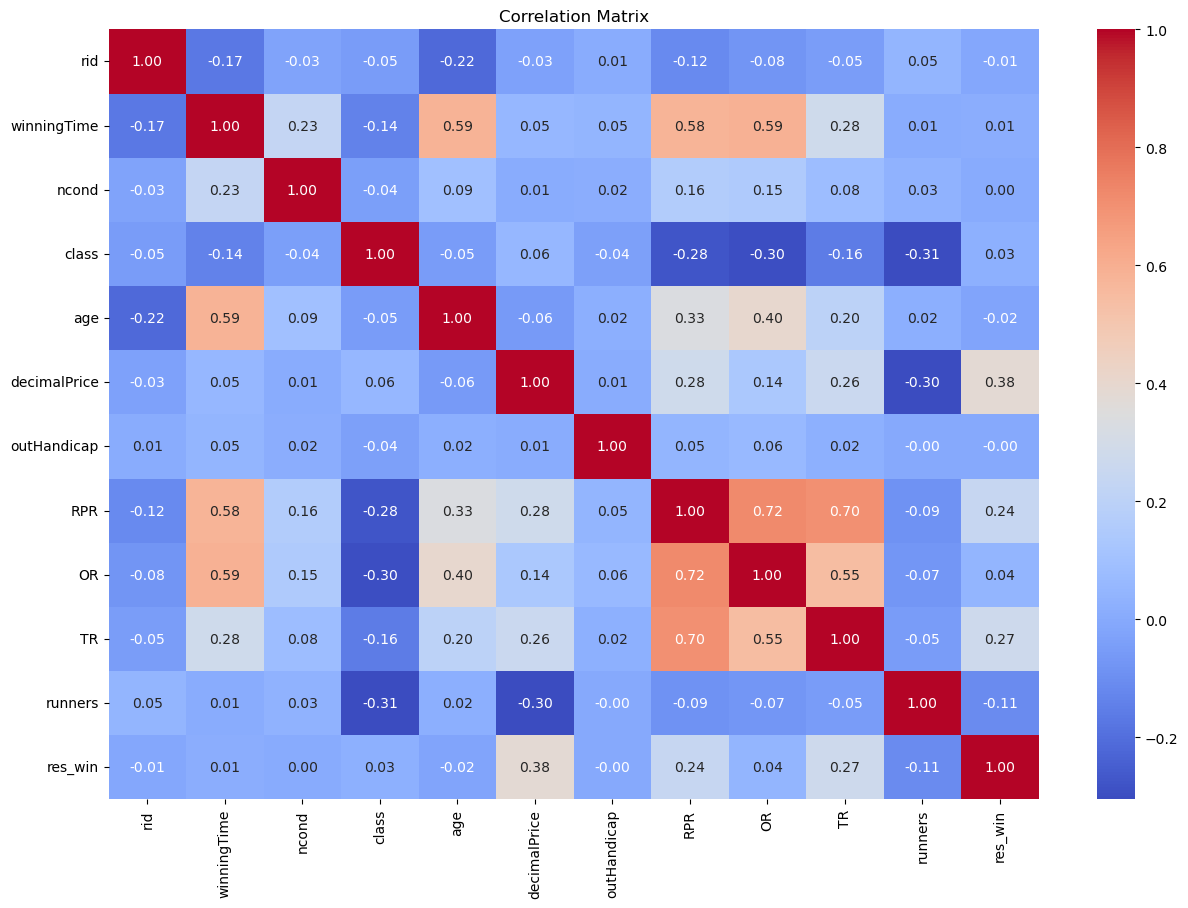

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = X_train.corr()

# Display the correlation matrix as a table
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Compile, Train and Evaluate the Model
### Since our Model 1 is trying to answer does a  "favorite horse" wins? Yes or No, we are using a classification model 

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

selected_df = tf.keras.Sequential([
    tf.keras.layers.Dense(500, input_dim=X_train.shape[1], activation="relu"),#first hidden layer
    tf.keras.layers.Dense(300, activation="tanh"), #2nd hidden layer
    tf.keras.layers.Dense(1, activation="sigmoid") #output layer
])

# Compile the model
selected_df.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

selected_df.fit(X_train_scaled, y_train, epochs=10)

# # Scale the test data (above)


# Check the structure of the model
selected_df.summary()



Epoch 1/10
905/905 [==============================] - 7s 6ms/step - loss: 0.0511 - accuracy: 0.9304
Epoch 2/10
905/905 [==============================] - 5s 5ms/step - loss: 0.0427 - accuracy: 0.9394
Epoch 3/10
905/905 [==============================] - 5s 5ms/step - loss: 0.0411 - accuracy: 0.9399
Epoch 4/10
905/905 [==============================] - 5s 6ms/step - loss: 0.0404 - accuracy: 0.9420
Epoch 5/10
905/905 [==============================] - 5s 6ms/step - loss: 0.0402 - accuracy: 0.9423
Epoch 6/10
905/905 [==============================] - 5s 6ms/step - loss: 0.0397 - accuracy: 0.9434
Epoch 7/10
905/905 [==============================] - 5s 6ms/step - loss: 0.0395 - accuracy: 0.9429
Epoch 8/10
905/905 [==============================] - 5s 6ms/step - loss: 0.0395 - accuracy: 0.9431
Epoch 9/10
905/905 [==============================] - 6s 6ms/step - loss: 0.0391 - accuracy: 0.9442
Epoch 10/10
905/905 [==============================] - 6s 7ms/step - loss: 0.0386 - accuracy: 0.9439

In [17]:
# Evaluate the model on the scaled test data
loss, accuracy = selected_df.evaluate(X_test_scaled, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

302/302 [==============================] - 2s 5ms/step - loss: 0.0406 - accuracy: 0.9408
Loss: 0.04060382768511772
Accuracy: 0.9407922029495239


In [18]:
# Make predictions on the test data
y_pred = selected_df.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

302/302 [==============================] - 1s 4ms/step


In [19]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)


Precision: 0.8476605005440696


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      8434
         1.0       0.85      0.64      0.73      1210

    accuracy                           0.94      9644
   macro avg       0.90      0.81      0.85      9644
weighted avg       0.94      0.94      0.94      9644



302/302 [==============================] - 1s 4ms/step


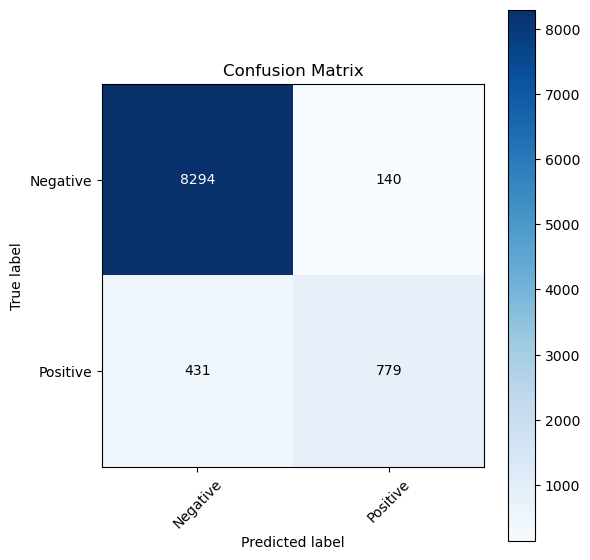

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained the model and predicted on the test set
y_pred = selected_df.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['Negative', 'Positive']  # Assuming your classes are labeled as 0 (Negative) and 1 (Positive)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Fill in the matrix cells with the values
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [22]:
# Create a DataFrame with actual and predicted labels
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_binary.flatten()})

# Filter under favorite horse - column y_test= 'isFav' (Actual = 1)
favorite_horse_df = results_df[results_df['Actual'] == 1]

# Calculate the average win rate for the favorite horse
favorite_horse_win_rate = favorite_horse_df['Predicted'].mean()

# Print the average win rate for the favorite horse
print("Average Win Rate for Favorite Horse:", favorite_horse_win_rate)

Average Win Rate for Favorite Horse: 0.643801652892562


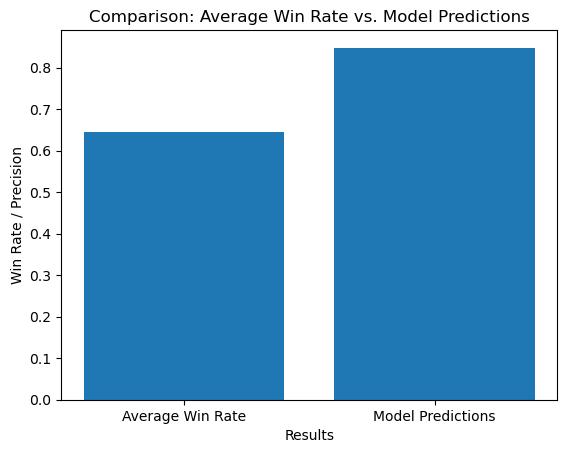

In [23]:
import matplotlib.pyplot as plt

# Calculate the average win rate for the favorite horse
favorite_horse_win_rate = favorite_horse_df['Predicted'].mean()

# Plotting the results
labels = ['Average Win Rate', 'Model Predictions']
values = [favorite_horse_win_rate, precision]

plt.bar(labels, values)
plt.xlabel('Results')
plt.ylabel('Win Rate / Precision')
plt.title('Comparison: Average Win Rate vs. Model Predictions')
plt.show()


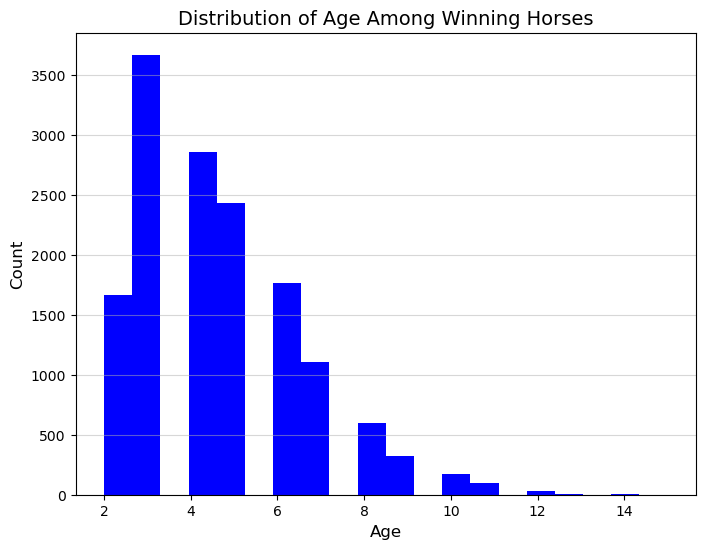

In [24]:
# Filter the dataset to include only winning horses
winning_horses_df = clean_m1_df[clean_m1_df['res_win'] == 1]

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the age distribution of winning horses
plt.hist(winning_horses_df['age'], bins=20, color='blue')

# Add gridlines
plt.grid(axis='y', alpha=0.5)

# Customize colors and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Age Among Winning Horses', fontsize=14)

# Set a light background color
plt.gca().set_facecolor('white')

# Show the plot
plt.show()

# testing with different parms

In [25]:
selected_df = tf.keras.Sequential([
    tf.keras.layers.Dense(80, input_dim=X_train.shape[1], activation="sigmoid"),
    tf.keras.layers.Dense(30, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

selected_df.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

selected_df.fit(X_train_scaled, y_train, epochs=10)

# Scale the test data (above)

# Check the structure of the model
selected_df.summary()


Epoch 1/10
905/905 [==============================] - 5s 4ms/step - loss: 0.3592 - accuracy: 0.8649
Epoch 2/10
905/905 [==============================] - 3s 4ms/step - loss: 0.2230 - accuracy: 0.9135
Epoch 3/10
905/905 [==============================] - 3s 4ms/step - loss: 0.1522 - accuracy: 0.9345
Epoch 4/10
905/905 [==============================] - 3s 3ms/step - loss: 0.1376 - accuracy: 0.9386
Epoch 5/10
905/905 [==============================] - 3s 3ms/step - loss: 0.1331 - accuracy: 0.9399
Epoch 6/10
905/905 [==============================] - 4s 4ms/step - loss: 0.1312 - accuracy: 0.9414
Epoch 7/10
905/905 [==============================] - 3s 3ms/step - loss: 0.1292 - accuracy: 0.9417
Epoch 8/10
905/905 [==============================] - 3s 3ms/step - loss: 0.1290 - accuracy: 0.9417
Epoch 9/10
905/905 [==============================] - 2s 3ms/step - loss: 0.1286 - accuracy: 0.9419
Epoch 10/10
905/905 [==============================] - 2s 3ms/step - loss: 0.1275 - accuracy: 0.9412

In [26]:
# Evaluate the model on the scaled test data
loss, accuracy = selected_df.evaluate(X_test_scaled, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

302/302 [==============================] - 1s 3ms/step - loss: 0.1214 - accuracy: 0.9415
Loss: 0.12137679010629654
Accuracy: 0.9415180683135986


In [27]:
# Make predictions on the test data
y_pred = selected_df.predict(X_test_scaled)
y_pred_binary = (y_pred > 0.5).astype(int)

302/302 [==============================] - 1s 2ms/step


In [28]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)


Precision: 0.8256048387096774


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      8434
         1.0       0.83      0.68      0.74      1210

    accuracy                           0.94      9644
   macro avg       0.89      0.83      0.86      9644
weighted avg       0.94      0.94      0.94      9644



302/302 [==============================] - 1s 2ms/step


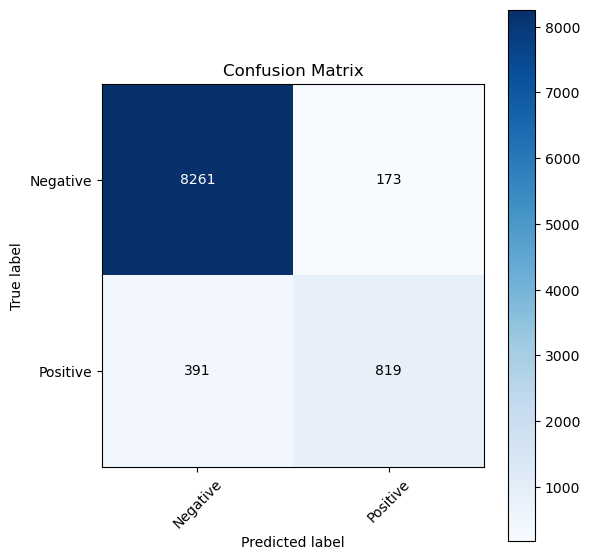

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained the model and predicted on the test set
y_pred = selected_df.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['Negative', 'Positive']  # Assuming your classes are labeled as 0 (Negative) and 1 (Positive)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Fill in the matrix cells with the values
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [31]:
# Create a DataFrame with actual and predicted labels
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_binary.flatten()})

# Filter under favorite horse - column y_test= 'isFav' (Actual = 1)
favorite_horse_df = results_df[results_df['Actual'] == 1]

# Calculate the average win rate for the favorite horse
favorite_horse_win_rate = favorite_horse_df['Predicted'].mean()

# Print the average win rate for the favorite horse
print("Average Win Rate for Favorite Horse:", favorite_horse_win_rate)



Average Win Rate for Favorite Horse: 0.6768595041322314


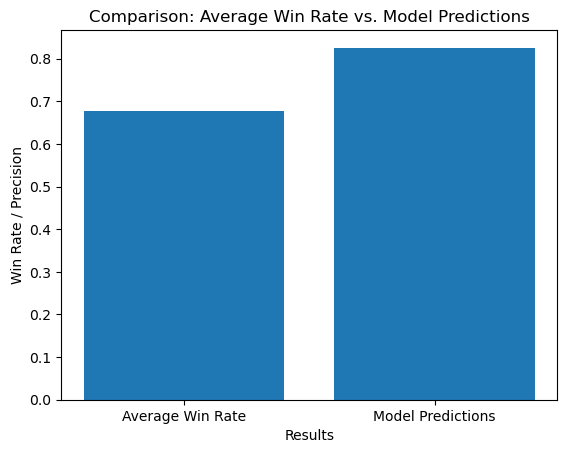

In [32]:
import matplotlib.pyplot as plt

# Calculate the average win rate for the favorite horse
favorite_horse_win_rate = favorite_horse_df['Predicted'].mean()

# Plotting the results
labels = ['Average Win Rate', 'Model Predictions']
values = [favorite_horse_win_rate, precision]

plt.bar(labels, values)
plt.xlabel('Results')
plt.ylabel('Win Rate / Precision')
plt.title('Comparison: Average Win Rate vs. Model Predictions')
plt.show()


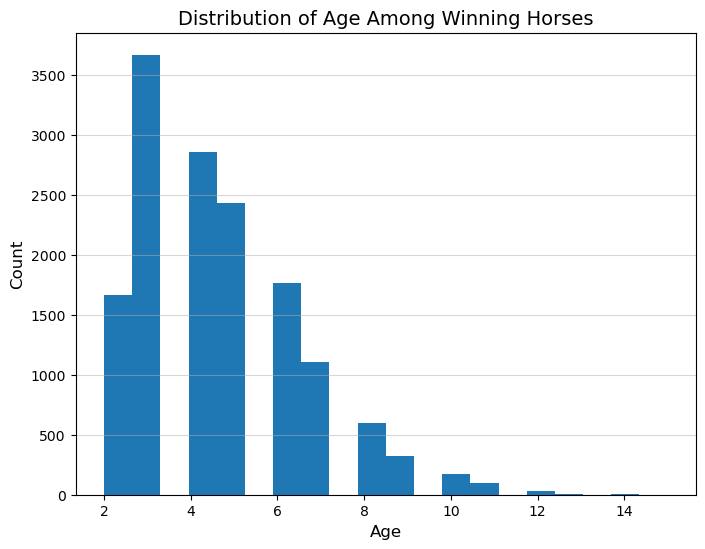

In [33]:
# Filter the dataset to include only winning horses
winning_horses_df = clean_m1_df[clean_m1_df['res_win'] == 1]

# Set the figure size
plt.figure(figsize=(8, 6))

# Plot the age distribution of winning horses
plt.hist(winning_horses_df['age'], bins=20)

# Add gridlines
plt.grid(axis='y', alpha=0.5)

# Customize colors and labels
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Age Among Winning Horses', fontsize=14)

# Set a light background color
plt.gca().set_facecolor('white')

# Show the plot
plt.show()
